In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

from qiskit import IBMQ, Aer, transpile, assemble
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_histogram, array_to_latex

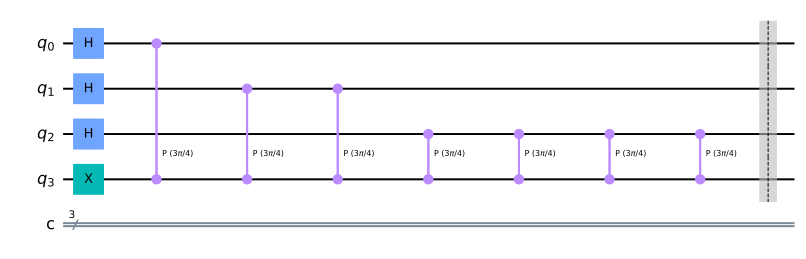

In [2]:
qpe = QuantumCircuit(4, 3)
qpe.x(3)

for qubit in range(3):
    qpe.h(qubit)
rep = 1
for counting_qubit in range(3):
    for i in range(rep):
        qpe.cp(3*math.pi/4, counting_qubit, 3);
    rep = rep * 2
qpe.barrier()
qpe.draw()

In [4]:
def qft_dagger(qc, n):
    for i in range(n-1, -1, -1):
        for j in range(n-1, i, -1):
            qc.cp(-math.pi/float(2**(j-i)), i, j)
        qc.h(i)

In [5]:
qft_dagger(qpe, 3)
qpe.barrier()

for n in range(3):
    qpe.measure(n,n)

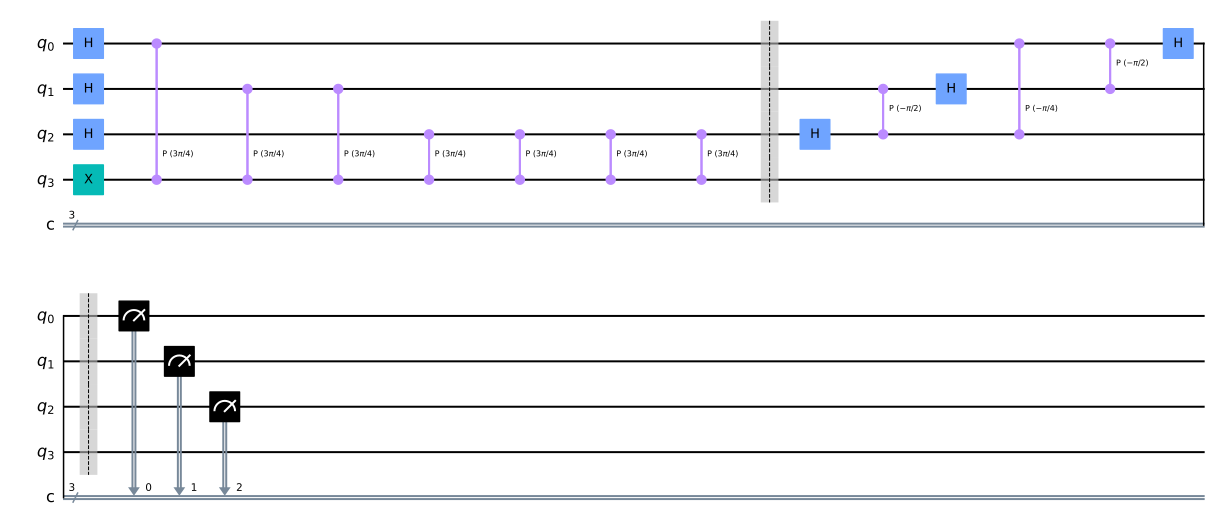

In [6]:
qpe.draw()

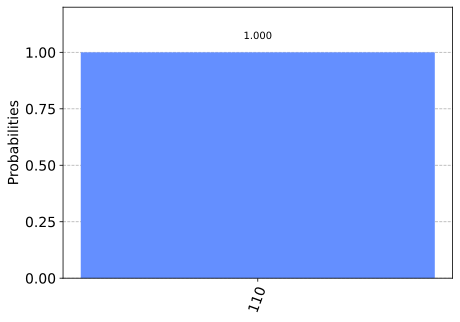

In [6]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 4096
t_qpe2 = transpile(qpe, aer_sim)
qobj = assemble(t_qpe2, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

## $q_0$를 LSB로 가도록 한다면 Histogram은 가장 밑이 LSB

In [7]:
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 5 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_manila


In [8]:
t_qpe2 = transpile(qpe, backend, optimization_level=3)
job = backend.run(t_qpe2, shot=4096)
job_monitor(job)

C:\Users\pmang\AppData\Local\Temp/ipykernel_19900/1560214418.py:2: UserWarning: shot is not a recognized runtime option and may be ignored by the backend.
  job = backend.run(t_qpe2, shot=4096)


Job Status: job has successfully run


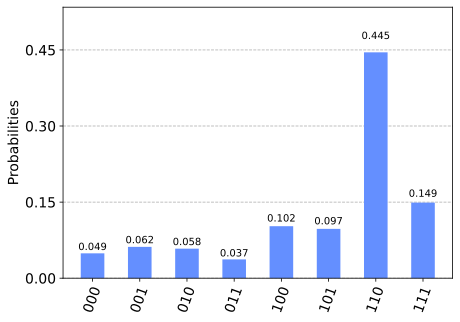

In [9]:
results = job.result()
answer = results.get_counts(qpe)

plot_histogram(answer)

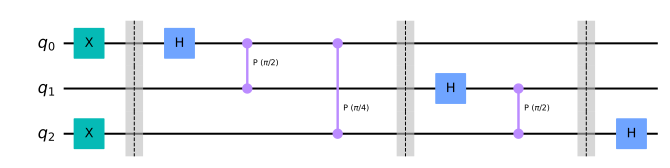

In [18]:
qc1 = QuantumCircuit(3)
qc1.x(0)
qc1.x(2)
qc1.barrier()
qc1.h(0)
qc1.cp(math.pi/2, 0, 1)
qc1.cp(math.pi/4, 0, 2)
qc1.barrier()
qc1.h(1)
qc1.cp(math.pi/2, 1, 2)
qc1.barrier()
qc1.h(2)
qc1.draw()

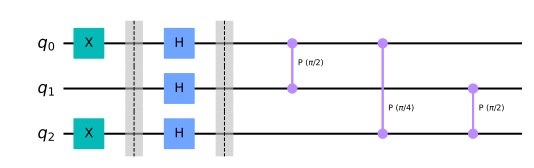

In [19]:
qc2 = QuantumCircuit(3)
qc2.x(0)
qc2.x(2)
qc2.barrier()
qc2.h(0)
qc2.h(1)
qc2.h(2)
qc2.barrier()
qc2.cp(math.pi/2, 0, 1)
qc2.cp(math.pi/4, 0, 2)
qc2.cp(math.pi/2, 1, 2)
qc2.draw()

In [20]:
qc1.save_statevector()
qc2.save_statevector()

qobj1 = assemble(qc1)
state1 = aer_sim.run(qobj1).result().get_statevector()
display(array_to_latex(state1))
qobj2 = assemble(qc2)
state2 = aer_sim.run(qobj2).result().get_statevector()
display(array_to_latex(state2))



<IPython.core.display.Latex object>

<IPython.core.display.Latex object>